# Tarea Grande 1

##### Nombre: Diego Bustamante

## Importación de librerías

En la siguiente celda, se importarán las librerías que serán utilizadas para esta parte de la tarea. Si deseas utilizar una librería adicional y que no sea *built-in*, repórtala en el ```README.md``` de tu repositorio. Solo así podremos saber que necesitamos instalar algo más para ejecutar tu tarea y evaluarla.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
#alt.renderers.enable('notebook')

## Cargar datos

In [2]:
datos=pd.read_csv("../dataset/data-cruda.csv")

## Estandarizar fechas

In [3]:
datos_procesados=datos.copy()
datos_procesados["day"]=pd.to_datetime(datos_procesados["fecha_siniestro"],dayfirst=True).dt.strftime('%A')
datos_procesados["month"]=pd.to_datetime(datos_procesados["fecha_siniestro"],dayfirst=True).dt.strftime('%B')
datos_procesados["fecha_siniestro"]=pd.to_datetime(datos_procesados["fecha_siniestro"],dayfirst=True).dt.strftime('%d-%m-%Y %H:%M')
datos_procesados["tipo_automovil"]=datos_procesados["tipo_automovil"].str.capitalize()
datos_procesados["marca"]=datos_procesados["marca"].str.capitalize()
datos_procesados["modelo"]=datos_procesados["modelo"].str.capitalize()
#Se procesarán todos los datos necesarios en las siguientes partes aquí (aparte de las fechas, las capitalizaciones por ej).
datos_procesados.to_csv("../dataset/datos_procesados.csv",index=False)

## Gráfico de línea sobre cantidad de robos según día de la semana

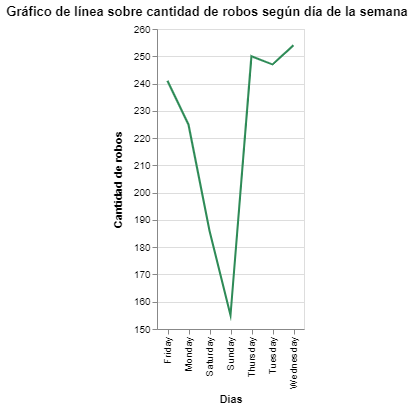

In [4]:
from sklearn import datasets
import numpy as np
from vega_datasets import data

alt.Chart(datos_procesados).mark_line(color='seagreen').encode(
    alt.X('day:N', title='Dias',scale=alt.Scale(zero=False)),
    alt.Y('count()', title='Cantidad de robos', scale=alt.Scale(zero=False, padding=1)),
).properties(title='Gráfico de línea sobre cantidad de robos según día de la semana')


## Gráfico de barra mes versus cantidad de robos

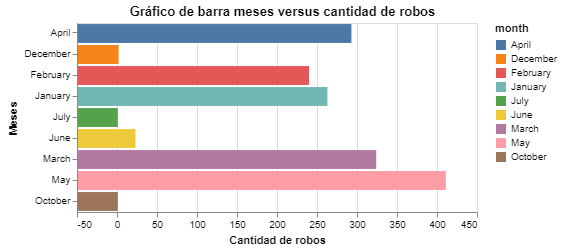

In [5]:
#datos_meses=datos_procesados.set_index(["month","day"]).count(level="month").reset_index()

alt.Chart(datos_procesados).mark_bar().encode(
    alt.X('count():Q', title='Cantidad de robos',scale=alt.Scale(zero=False, padding=1)),
    alt.Y('month:N', title='Meses', scale=alt.Scale(zero=False)),
    color='month',
).properties(title='Gráfico de barra meses versus cantidad de robos')

## Gráficos de barra vertical de marcas y tipos de automóviles más robados

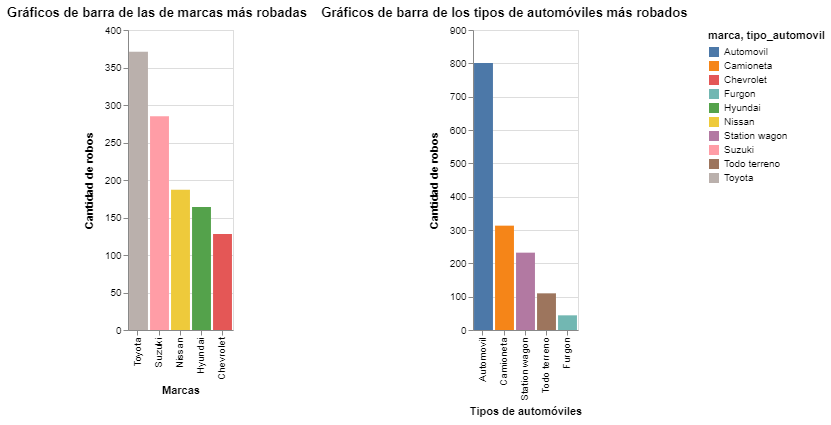

In [6]:
graf1=alt.Chart(datos_procesados).transform_aggregate(
    count='count()',
    groupby=['marca']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    alt.datum.rank < 6
).mark_bar().encode(
    x=alt.X('marca:N',
        sort=alt.EncodingSortField(field='count', op='sum', order='descending'), title='Marcas'
    ),
    y=alt.Y('count:Q',title='Cantidad de robos'),
    color='marca'
).properties(title='Gráficos de barra de las de marcas más robadas')

graf2=alt.Chart(datos_procesados).transform_aggregate(
    count='count()',
    groupby=['tipo_automovil']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    alt.datum.rank < 6
).mark_bar().encode(
    x=alt.X('tipo_automovil:N',
        sort=alt.EncodingSortField(field='count', op='sum', order='descending'), title='Tipos de automóviles'
    ),
    y=alt.Y('count:Q',title='Cantidad de robos'),
    color='tipo_automovil'
).properties(title='Gráficos de barra de los tipos de automóviles más robados')

graf1|graf2